In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import math as m

C:\Users\gnana\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [47]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE

In [2]:
df = pd.read_csv('final_dataset.csv')

C:\Windows\Temp\ipykernel_26880\4240546656.py:1: DtypeWarning: Columns (7,8,9,10,11,14,15,16,17,18,19,20,21,23,24,25,26,27,28,29,30,31,32,33) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('final_dataset.csv')


In [3]:
df

,date,Mkt-RF,SMB,HML,RMW,CMA,RF,DGS10,RIFSPPFAAD90NB,DGS1,...,DCOILBRENTEU,ads_index,open,high,low,close,volume,dividends,stock_splits,SP500
0,1854-12-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1854-12-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1854-12-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1854-12-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1854-12-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62051,2024-10-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,234.449997,236.850006,234.449997,236.479996,36254500.0,0.0,0.0,NaN
62052,2024-10-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,233.889999,236.220001,232.600006,235.860001,38846600.0,0.0,0.0,NaN
62053,2024-10-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,234.080002,235.139999,227.759995,230.759995,52287000.0,0.0,0.0,NaN
62054,2024-10-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,229.979996,230.820007,228.410004,230.570007,31109500.0,0.0,0.0,NaN


In [4]:
df.shape

(62056, 43)

In [5]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df.set_index('date', inplace=True)

In [6]:
# Step 2: Slice the data to include only dates after 2004-01-01
df = df.loc['2004-01-01':]

In [7]:
# List of columns to check for NaN values
columns_to_check = ['open', 'high', 'low', 'close', 'volume', 'SP500']

# Remove rows where all specified columns are NaN
df_cleaned = df.dropna(subset=columns_to_check, how='all')

In [8]:
df.describe()

,Mkt-RF,SMB,HML,RMW,CMA,RF,USRECDP,USRECD,USRECDM,ads_index,open,high,low,close,volume,dividends,stock_splits,SP500
count,5201.000000,5201.000000,5201.000000,5201.000000,5201.000000,5201.000000,7599.000000,7599.000000,7599.000000,7591.000000,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1258.000000,1258.000000,2512.000000
mean,0.040711,0.000535,-0.001181,0.016435,-0.000094,0.005839,0.080011,0.080011,0.080274,-0.250928,146.176032,147.800565,144.654762,146.308836,9.266660e+07,0.003549,0.003180,3280.603420
std,1.208168,0.631346,0.787480,0.453615,0.380189,0.007202,0.271327,0.271327,0.271734,2.071278,41.786013,42.021225,41.525784,41.786841,5.291959e+07,0.028021,0.112777,1034.017927
min,-12.000000,-4.550000,-4.970000,-2.720000,-2.740000,0.000000,0.000000,0.000000,0.000000,-26.524400,55.472059,55.574208,51.709551,54.569736,2.404830e+07,0.000000,0.000000,1829.080000
25%,-0.430000,-0.360000,-0.330000,-0.230000,-0.200000,0.000000,0.000000,0.000000,0.000000,-0.372406,122.872769,124.133498,121.650088,123.003281,5.761422e+07,0.000000,0.000000,2381.642500
50%,0.070000,0.000000,-0.020000,0.010000,-0.010000,0.001000,0.000000,0.000000,0.000000,-0.095002,147.627858,149.251860,146.196051,147.771301,7.875405e+07,0.000000,0.000000,2951.235000
75%,0.590000,0.350000,0.310000,0.250000,0.190000,0.009000,0.000000,0.000000,0.000000,0.151029,173.652050,175.598158,172.271674,173.622738,1.093357e+08,0.000000,0.000000,4155.500000
max,11.350000,5.720000,6.730000,4.210000,2.520000,0.022000,1.000000,1.000000,1.000000,9.440280,236.206595,237.490005,234.449997,236.479996,4.265100e+08,0.250000,4.000000,5864.670000


In [9]:
# Drop columns that contain only NaN and 0.0 values
df = df.drop(columns=[col for col in df.columns if df[col].isna().all() or (df[col] == 0.0).all()])


In [10]:
df = df.apply(lambda col: pd.to_numeric(col.replace('.', np.nan), errors='coerce')).fillna(0.0)

In [11]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7604 entries, 2004-01-01 to 2024-10-25
Data columns (total 42 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Mkt-RF          7604 non-null   float64
 1   SMB             7604 non-null   float64
 2   HML             7604 non-null   float64
 3   RMW             7604 non-null   float64
 4   CMA             7604 non-null   float64
 5   RF              7604 non-null   float64
 6   DGS10           7604 non-null   float64
 7   RIFSPPFAAD90NB  7604 non-null   float64
 8   DGS1            7604 non-null   float64
 9   CBETHUSD        7604 non-null   float64
 10  DBAA            7604 non-null   float64
 11  USRECDP         7604 non-null   float64
 12  USRECD          7604 non-null   float64
 13  DCPN3M          7604 non-null   float64
 14  DCPF1M          7604 non-null   float64
 15  DAAA            7604 non-null   float64
 16  T10Y3M          7604 non-null   float64
 17  BAMLH0A0HYM2   

In [ ]:
# df.replace({np.nan: 0.0}, inplace=True)

In [ ]:
# df.apply(lambda col: pd.to_numeric(col.replace('.', np.nan), errors='coerce'))

In [ ]:
# # Step 3: Drop columns that contain all NaN values
# df.dropna(axis=1, how='all', inplace=True)

In [12]:
df.head(30)

,Mkt-RF,SMB,HML,RMW,CMA,RF,DGS10,RIFSPPFAAD90NB,DGS1,CBETHUSD,...,DCOILBRENTEU,ads_index,open,high,low,close,volume,dividends,stock_splits,SP500
date,,,,,,,,,,,,,,,,,,,,,
2004-01-01,0.00,0.00,0.00,0.00,0.00,0.000,0.00,0.00,0.00,0.0,...,0.0,-0.350430,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2004-01-02,-0.17,0.79,0.43,-0.58,0.63,0.003,4.38,1.03,1.31,0.0,...,0.0,-0.358053,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2004-01-03,0.00,0.00,0.00,0.00,0.00,0.000,0.00,0.00,0.00,0.0,...,0.0,-0.364606,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2004-01-04,0.00,0.00,0.00,0.00,0.00,0.000,0.00,0.00,0.00,0.0,...,0.0,-0.370091,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2004-01-05,1.20,0.28,0.01,-0.77,0.82,0.003,4.41,1.05,1.35,0.0,...,0.0,-0.374915,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2004-01-06,0.20,0.05,0.26,-0.48,0.56,0.003,4.29,1.05,1.30,0.0,...,0.0,-0.379080,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2004-01-07,0.34,0.51,-0.08,-0.52,0.20,0.003,4.27,1.05,1.29,0.0,...,0.0,-0.382588,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2004-01-08,0.45,0.30,0.70,-0.89,1.00,0.003,4.27,1.04,1.29,0.0,...,0.0,-0.385441,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2004-01-09,-0.72,0.01,0.29,-0.48,0.14,0.003,4.11,1.04,1.21,0.0,...,0.0,-0.387639,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df.dtypes

In [ ]:
# # Select only numeric columns
# df_numeric = df.select_dtypes(include=[np.number])

# # Calculate the correlation matrix on the numeric-only DataFrame
# corr_matrix = df_numeric.corr().abs()


In [ ]:
# # Step 2: Create an upper triangle mask
# upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# # Step 3: Identify columns with correlation above a specified threshold
# threshold = 0.9
# to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > threshold)]

# # Step 4: Drop the highly correlated columns
# df_reduced = df.drop(columns=to_drop)

# # Output the cleaned DataFrame
# print("Reduced DataFrame with dropped correlated features:")
# print(df_reduced)


In [ ]:
len(df)

In [ ]:
df.head(1)

In [14]:
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.expand_frame_repr', False)  # Prevent wrapping to a new line

# Display the DataFrame for a specific date
date_of_interest = '2014-02-18'  # Change this to your desired date
specific_date_data = df.loc[date_of_interest]

print(specific_date_data)

Mkt-RF                0.270000
SMB                   0.940000
HML                  -0.240000
RMW                  -0.310000
CMA                  -0.260000
RF                    0.000000
DGS10                 2.710000
RIFSPPFAAD90NB        0.120000
DGS1                  0.120000
CBETHUSD              0.000000
DBAA                  0.000000
USRECDP               0.000000
USRECD                0.000000
DCPN3M                0.120000
DCPF1M                0.070000
DAAA                  4.470000
T10Y3M                2.660000
BAMLH0A0HYM2          4.010000
T10YIE                2.140000
DHHNGSP               5.800000
AMERIBOR              0.000000
USRECDM               0.000000
CBBTCUSD              0.000000
DEXUSUK               1.669600
DCOILWTICO          102.540000
VIXCLS               13.870000
DEXJPUS             102.310000
DEXUSEU               1.375800
T5YIE                 1.790000
OBMMIJUMBO30YF        0.000000
NIKKEI225         14843.240000
BAMLH0A0HYM2EY        5.690000
DCOILBRE

In [15]:
# Drop the 'dividends' and 'stock_splits' columns
df = df.drop(columns=['dividends', 'stock_splits'])

In [16]:
# List of columns to check for NaN values
columns_to_check = ['open', 'high', 'low', 'close', 'volume', 'SP500']

# Remove rows where all specified columns are NaN
df_cleaned = df.dropna(subset=columns_to_check, how='all')

In [19]:
df_cleaned.shape

(7604, 40)

In [18]:
# Step 3: Remove columns with only 0.0 and NaN values
df_cleaned= df_cleaned.loc[:, ~(df_cleaned.isna().all() | (df_cleaned == 0.0).all())]

# Display the cleaned DataFrame
# print(df_cleaned)

In [ ]:
# df_cleaned.head(50)

In [ ]:
# df1['DBAA'].mean()

In [ ]:
# np.mean(df1['BAMLH0A0HYM2'])

In [ ]:
# Check the data types of all columns
print(df_cleaned.dtypes)

In [ ]:
 correlation_matrix = df_cleaned.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap')
plt.show()

In [20]:
df_cleaned["tomorrow"] = df_cleaned["close"].shift(-1)

In [21]:
df_cleaned.tail(20)

,Mkt-RF,SMB,HML,RMW,CMA,RF,DGS10,RIFSPPFAAD90NB,DGS1,CBETHUSD,DBAA,USRECDP,USRECD,DCPN3M,DCPF1M,DAAA,T10Y3M,BAMLH0A0HYM2,T10YIE,DHHNGSP,AMERIBOR,USRECDM,CBBTCUSD,DEXUSUK,DCOILWTICO,VIXCLS,DEXJPUS,DEXUSEU,T5YIE,OBMMIJUMBO30YF,NIKKEI225,BAMLH0A0HYM2EY,DCOILBRENTEU,ads_index,open,high,low,close,volume,SP500,tomorrow
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2024-10-06,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,2421.68,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4.88586,0.0,62200.28,0.0000,0.00,0.00,0.00,0.0000,0.00,0.000,0.00,0.00,0.00,-0.241751,0.000000,0.000000,0.000000,0.000000,0.0,0.00,221.690002
2024-10-07,0.0,0.0,0.0,0.0,0.0,0.0,4.03,0.00,4.24,2439.48,5.57,0.0,0.0,4.57,0.00,4.87,-0.74,2.95,2.27,2.51,4.88826,0.0,62122.02,1.3080,77.76,22.64,148.13,1.0976,2.17,6.652,39332.74,6.88,81.74,-0.231535,224.500000,225.690002,221.330002,221.690002,39505400.0,5695.94,225.770004
2024-10-08,0.0,0.0,0.0,0.0,0.0,0.0,4.04,4.57,4.21,2368.66,5.59,0.0,0.0,4.58,0.00,4.89,-0.71,2.99,2.27,2.51,4.88958,0.0,60578.28,1.3093,74.26,21.42,148.22,1.0970,2.17,6.716,38937.54,6.91,78.19,-0.222386,224.300003,225.979996,223.250000,225.770004,31855700.0,5751.13,229.539993
2024-10-09,0.0,0.0,0.0,0.0,0.0,0.0,4.06,0.00,4.24,2384.32,5.60,0.0,0.0,0.00,0.00,4.91,-0.69,2.94,2.29,2.43,4.88906,0.0,60279.53,1.3080,73.85,20.86,149.20,1.0951,2.21,6.642,39277.96,6.91,77.06,-0.214301,225.229996,229.750000,224.830002,229.539993,33591100.0,5792.04,229.039993
2024-10-10,0.0,0.0,0.0,0.0,0.0,0.0,4.09,4.54,4.22,2438.77,5.63,0.0,0.0,4.61,0.00,4.94,-0.66,2.99,2.33,2.26,4.89032,0.0,62518.75,1.3053,76.46,20.93,148.56,1.0925,2.26,6.784,39380.89,6.95,79.45,-0.207277,227.779999,229.500000,227.169998,229.039993,28183500.0,5780.05,227.550003
2024-10-11,0.0,0.0,0.0,0.0,0.0,0.0,4.08,4.66,4.18,2475.79,5.62,0.0,0.0,0.00,4.78,4.93,-0.65,2.98,2.33,2.31,4.89071,0.0,63187.47,1.3070,76.11,20.46,149.12,1.0942,2.25,6.625,39605.80,6.92,80.27,-0.201311,229.300003,229.410004,227.339996,227.550003,31759200.0,5815.03,0.000000
2024-10-12,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,2467.67,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4.89071,0.0,62845.30,0.0000,0.00,0.00,0.00,0.0000,0.00,0.000,0.00,0.00,0.00,-0.196400,0.000000,0.000000,0.000000,0.000000,0.0,0.00,0.000000
2024-10-13,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,2628.74,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4.89071,0.0,66065.65,0.0000,0.00,0.00,0.00,0.0000,0.00,0.000,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00,231.300003
2024-10-14,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,2606.63,0.00,0.0,0.0,0.00,0.00,0.00,0.00,2.97,0.00,0.00,4.89071,0.0,67056.60,0.0000,76.11,19.70,0.00,0.0000,0.00,0.000,0.00,6.89,78.47,0.000000,228.699997,231.729996,228.600006,231.300003,39882100.0,5859.85,233.850006


In [24]:
# List of columns to check for NaN values
columns_to_check = ['open', 'high', 'low', 'close', 'volume', 'SP500']
# Step 2: Remove rows where any of the specified columns are 0.0
df_cleaned = df_cleaned[~df_cleaned[columns_to_check].isin([0.0]).any(axis=1)]

# Display the cleaned DataFrame
print(df_cleaned)

            Mkt-RF   SMB   HML   RMW   CMA     RF  DGS10  RIFSPPFAAD90NB  DGS1  CBETHUSD  DBAA  USRECDP  USRECD  DCPN3M  DCPF1M  DAAA  T10Y3M  BAMLH0A0HYM2  T10YIE  DHHNGSP  AMERIBOR  USRECDM  CBBTCUSD  DEXUSUK  DCOILWTICO  VIXCLS  DEXJPUS  DEXUSEU  T5YIE  OBMMIJUMBO30YF  NIKKEI225  BAMLH0A0HYM2EY  DCOILBRENTEU  ads_index        open        high         low       close       volume    SP500    tomorrow
date                                                                                                                                                                                                                                                                                                                                                                                                                 
2019-10-28    0.62  0.28 -0.24  0.01 -0.04  0.007   1.85            1.77  1.60    181.87  4.01      0.0     0.0    1.78    0.00  3.08    0.20          3.85    1.64     2.49  1.860921      

In [27]:
df_cleaned.tail(10)

,Mkt-RF,SMB,HML,RMW,CMA,RF,DGS10,RIFSPPFAAD90NB,DGS1,CBETHUSD,DBAA,USRECDP,USRECD,DCPN3M,DCPF1M,DAAA,T10Y3M,BAMLH0A0HYM2,T10YIE,DHHNGSP,AMERIBOR,USRECDM,CBBTCUSD,DEXUSUK,DCOILWTICO,VIXCLS,DEXJPUS,DEXUSEU,T5YIE,OBMMIJUMBO30YF,NIKKEI225,BAMLH0A0HYM2EY,DCOILBRENTEU,ads_index,open,high,low,close,volume,SP500,tomorrow
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2024-10-07,0.0,0.0,0.0,0.0,0.0,0.0,4.03,0.00,4.24,2439.48,5.57,0.0,0.0,4.57,0.00,4.87,-0.74,2.95,2.27,2.51,4.88826,0.0,62122.02,1.3080,77.76,22.64,148.13,1.0976,2.17,6.652,39332.74,6.88,81.74,-0.231535,224.500000,225.690002,221.330002,221.690002,39505400.0,5695.94,225.770004
2024-10-08,0.0,0.0,0.0,0.0,0.0,0.0,4.04,4.57,4.21,2368.66,5.59,0.0,0.0,4.58,0.00,4.89,-0.71,2.99,2.27,2.51,4.88958,0.0,60578.28,1.3093,74.26,21.42,148.22,1.0970,2.17,6.716,38937.54,6.91,78.19,-0.222386,224.300003,225.979996,223.250000,225.770004,31855700.0,5751.13,229.539993
2024-10-09,0.0,0.0,0.0,0.0,0.0,0.0,4.06,0.00,4.24,2384.32,5.60,0.0,0.0,0.00,0.00,4.91,-0.69,2.94,2.29,2.43,4.88906,0.0,60279.53,1.3080,73.85,20.86,149.20,1.0951,2.21,6.642,39277.96,6.91,77.06,-0.214301,225.229996,229.750000,224.830002,229.539993,33591100.0,5792.04,229.039993
2024-10-10,0.0,0.0,0.0,0.0,0.0,0.0,4.09,4.54,4.22,2438.77,5.63,0.0,0.0,4.61,0.00,4.94,-0.66,2.99,2.33,2.26,4.89032,0.0,62518.75,1.3053,76.46,20.93,148.56,1.0925,2.26,6.784,39380.89,6.95,79.45,-0.207277,227.779999,229.500000,227.169998,229.039993,28183500.0,5780.05,227.550003
2024-10-11,0.0,0.0,0.0,0.0,0.0,0.0,4.08,4.66,4.18,2475.79,5.62,0.0,0.0,0.00,4.78,4.93,-0.65,2.98,2.33,2.31,4.89071,0.0,63187.47,1.3070,76.11,20.46,149.12,1.0942,2.25,6.625,39605.80,6.92,80.27,-0.201311,229.300003,229.410004,227.339996,227.550003,31759200.0,5815.03,0.000000
2024-10-14,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,2606.63,0.00,0.0,0.0,0.00,0.00,0.00,0.00,2.97,0.00,0.00,4.89071,0.0,67056.60,0.0000,76.11,19.70,0.00,0.0000,0.00,0.000,0.00,6.89,78.47,0.000000,228.699997,231.729996,228.600006,231.300003,39882100.0,5859.85,233.850006
2024-10-15,0.0,0.0,0.0,0.0,0.0,0.0,4.03,0.00,4.18,2610.54,5.56,0.0,0.0,4.62,4.82,4.86,-0.70,2.93,2.28,2.37,4.89403,0.0,67608.44,1.3083,71.22,20.64,149.22,1.0899,2.22,6.718,39910.55,6.82,73.68,0.000000,233.610001,237.490005,232.369995,233.850006,64751400.0,5815.26,231.779999
2024-10-16,0.0,0.0,0.0,0.0,0.0,0.0,4.02,4.58,4.17,2604.91,5.53,0.0,0.0,0.00,0.00,4.84,-0.70,2.90,2.27,0.00,4.89384,0.0,67402.33,1.3000,0.00,19.58,149.71,1.0873,2.19,6.740,39180.30,6.78,0.00,0.000000,231.600006,232.119995,229.839996,231.779999,34082200.0,5842.47,232.149994
2024-10-17,0.0,0.0,0.0,0.0,0.0,0.0,4.09,0.00,4.21,2641.98,5.62,0.0,0.0,4.62,0.00,4.94,-0.65,2.89,2.30,0.00,4.89447,0.0,68426.11,1.3008,0.00,19.11,150.12,1.0837,2.22,6.783,38911.19,6.81,0.00,0.000000,233.429993,233.850006,230.520004,232.149994,32993800.0,5841.47,235.000000


In [25]:
df_cleaned.shape

(1253, 41)

In [31]:
df_cleaned.describe()

,Mkt-RF,SMB,HML,RMW,CMA,RF,DGS10,RIFSPPFAAD90NB,DGS1,CBETHUSD,DBAA,USRECDP,USRECD,DCPN3M,DCPF1M,DAAA,T10Y3M,BAMLH0A0HYM2,T10YIE,DHHNGSP,AMERIBOR,USRECDM,CBBTCUSD,DEXUSUK,DCOILWTICO,VIXCLS,DEXJPUS,DEXUSEU,T5YIE,OBMMIJUMBO30YF,NIKKEI225,BAMLH0A0HYM2EY,DCOILBRENTEU,ads_index,open,high,low,close,volume,SP500,tomorrow
count,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1.253000e+03,1253.000000,1253.000000
mean,0.055060,-0.005315,0.000790,0.025722,0.003105,0.008349,2.573966,1.433272,2.483528,1867.991357,4.638500,0.032721,0.034318,0.885595,1.068843,3.717614,0.117542,4.174781,2.146313,3.400072,2.431630,0.032721,33240.425754,1.270212,70.374198,21.303982,124.943033,1.097734,2.184174,4.964858,27196.306688,6.667454,73.342330,-0.261528,145.831851,147.454797,144.311971,145.962838,9.287894e+07,4151.985555,114.601722
std,1.365711,0.815588,1.132919,0.643385,0.567874,0.008988,1.375338,2.024871,2.189312,1165.475951,1.188059,0.177978,0.182116,1.698297,1.859800,1.138654,1.171548,1.158183,0.452702,2.036154,2.350176,0.177978,18796.268317,0.149992,21.392503,8.349198,22.307092,0.129905,0.608854,1.823092,8588.579245,1.726119,23.960041,4.040833,41.511416,41.745800,41.251220,41.508339,5.291614e+07,715.517117,70.356323
min,-12.000000,-4.550000,-4.970000,-2.180000,-2.740000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.890000,2.880000,0.000000,0.000000,0.069040,0.000000,0.000000,0.000000,-36.980000,11.540000,0.000000,0.000000,0.000000,0.000000,0.000000,3.920000,0.000000,-26.524400,55.472059,55.574208,51.709551,54.569736,2.404830e+07,2237.400000,0.000000
25%,-0.520000,-0.500000,-0.640000,-0.370000,-0.310000,0.000000,1.380000,0.000000,0.140000,1112.890000,3.510000,0.000000,0.000000,0.000000,0.000000,2.640000,-1.110000,3.330000,2.060000,2.100000,0.105036,0.000000,17942.220000,1.240300,59.020000,15.650000,108.940000,1.074700,1.940000,3.212000,24023.100000,5.070000,62.720000,-0.310149,122.490392,124.053675,121.514686,122.892349,5.804620e+07,3719.890000,66.523659
50%,0.040000,0.000000,-0.020000,0.000000,0.000000,0.006000,2.720000,0.140000,1.850000,1823.060000,4.870000,0.000000,0.000000,0.050000,0.000000,3.890000,0.300000,3.890000,2.280000,2.620000,1.608718,0.000000,29788.610000,1.276500,74.000000,19.590000,125.920000,1.097100,2.280000,4.677000,27927.370000,7.050000,77.720000,-0.028066,147.352527,149.166568,146.162414,147.735016,7.885260e+07,4158.240000,135.893448
75%,0.730000,0.430000,0.610000,0.420000,0.340000,0.019000,3.880000,2.640000,4.800000,2700.280000,5.740000,0.000000,0.000000,0.630000,1.560000,4.760000,1.260000,4.650000,2.390000,4.120000,5.272630,0.000000,47022.820000,1.329400,82.410000,24.860000,143.770000,1.158400,2.530000,6.791000,31524.220000,8.230000,86.290000,0.344988,173.313145,175.255332,172.036334,173.196350,1.095782e+08,4532.760000,169.244278
max,9.340000,5.720000,6.730000,4.210000,2.520000,0.022000,4.980000,5.540000,5.490000,4805.950000,6.810000,1.000000,1.000000,5.420000,5.440000,5.800000,2.270000,10.870000,3.020000,23.860000,5.541220,1.000000,73098.480000,1.418800,123.640000,82.690000,161.730000,1.229500,3.590000,8.232000,42224.020000,11.380000,133.180000,9.440280,236.206595,237.490005,234.009995,235.000000,4.265100e+08,5864.670000,235.000000


In [35]:
df_cleaned['close_lag1'] = df_cleaned['close'].shift(1)
df_cleaned['close_lag2'] = df_cleaned['close'].shift(2)

In [54]:
y = df_cleaned['tomorrow']  # This is what you want to predict

# Define the features (X), including lagged close prices and other columns
X = df_cleaned[['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA', 'RF', 'DGS10', 'RIFSPPFAAD90NB',
         'DGS1', 'CBETHUSD', 'DBAA', 'USRECDP', 'USRECD', 'DCPN3M', 'DCPF1M',
         'DAAA', 'T10Y3M', 'BAMLH0A0HYM2', 'T10YIE', 'DHHNGSP', 'AMERIBOR',
         'USRECDM', 'CBBTCUSD', 'DEXUSUK', 'DCOILWTICO', 'VIXCLS', 'DEXJPUS',
         'DEXUSEU', 'T5YIE', 'OBMMIJUMBO30YF', 'NIKKEI225', 'BAMLH0A0HYM2EY',
         'DCOILBRENTEU', 'ads_index', 'open', 'high', 'low', 'volume', 'SP500',
         'close', 'close_lag1', 'close_lag2']]  

In [55]:
column_list = X.columns.tolist()
print(column_list)

['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA', 'RF', 'DGS10', 'RIFSPPFAAD90NB', 'DGS1', 'CBETHUSD', 'DBAA', 'USRECDP', 'USRECD', 'DCPN3M', 'DCPF1M', 'DAAA', 'T10Y3M', 'BAMLH0A0HYM2', 'T10YIE', 'DHHNGSP', 'AMERIBOR', 'USRECDM', 'CBBTCUSD', 'DEXUSUK', 'DCOILWTICO', 'VIXCLS', 'DEXJPUS', 'DEXUSEU', 'T5YIE', 'OBMMIJUMBO30YF', 'NIKKEI225', 'BAMLH0A0HYM2EY', 'DCOILBRENTEU', 'ads_index', 'open', 'high', 'low', 'volume', 'SP500', 'close', 'close_lag1', 'close_lag2']


In [62]:
X[['close_lag1', 'close_lag2']] = X[['close_lag1', 'close_lag2']].fillna(0)

C:\Windows\Temp\ipykernel_26880\2451904782.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['close_lag1', 'close_lag2']] = X[['close_lag1', 'close_lag2']].fillna(0)


## Outlier analysis

In [79]:
X.head(10)

,Mkt-RF,SMB,HML,RMW,CMA,RF,DGS10,RIFSPPFAAD90NB,DGS1,CBETHUSD,DBAA,USRECDP,USRECD,DCPN3M,DCPF1M,DAAA,T10Y3M,BAMLH0A0HYM2,T10YIE,DHHNGSP,AMERIBOR,USRECDM,CBBTCUSD,DEXUSUK,DCOILWTICO,VIXCLS,DEXJPUS,DEXUSEU,T5YIE,OBMMIJUMBO30YF,NIKKEI225,BAMLH0A0HYM2EY,DCOILBRENTEU,ads_index,open,high,low,volume,SP500,close,close_lag1,close_lag2
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-10-28,0.62,0.28,-0.24,0.01,-0.04,0.007,1.85,1.77,1.60,181.87,4.01,0.0,0.0,1.78,0.00,3.08,0.20,3.85,1.64,2.49,1.860921,0.0,9221.96,1.2860,55.60,13.11,109.02,1.1094,1.53,3.950,22867.27,5.57,60.39,-0.670693,59.853616,60.296314,59.684279,96572800.0,3039.42,60.247932,0.000000,0.000000
2019-10-29,-0.13,0.40,0.50,-0.06,0.10,0.007,1.84,1.84,1.59,190.93,3.99,0.0,0.0,1.73,1.79,3.07,0.21,3.86,1.61,2.61,1.867621,0.0,9431.27,1.2905,55.34,13.20,108.83,1.1117,1.51,3.941,22974.13,5.56,61.05,-0.633029,60.228575,60.417265,58.680346,142839600.0,3036.89,58.854519,60.247932,0.000000
2019-10-30,0.27,-0.64,-1.16,-0.48,-0.02,0.007,1.78,1.83,1.59,183.63,3.95,0.0,0.0,1.75,1.73,3.07,0.16,3.96,1.57,2.71,1.865871,0.0,9175.77,1.2872,54.85,12.33,108.88,1.1123,1.47,3.992,22843.12,5.63,60.22,-0.592919,59.210137,59.340771,58.351356,124522000.0,3046.77,58.847271,58.854519,60.247932
2019-10-31,-0.38,-0.34,-0.43,-0.28,0.19,0.007,1.69,1.71,1.53,182.06,3.87,0.0,0.0,1.67,1.66,2.99,0.15,4.15,1.54,2.73,1.632630,0.0,9146.75,1.2939,54.02,13.22,108.09,1.1155,1.44,3.898,22927.04,5.73,59.30,-0.550348,59.810074,60.276961,57.395800,139162000.0,3037.56,60.177776,58.847271,58.854519
2019-11-01,1.08,0.65,0.84,-0.18,0.14,0.006,1.73,1.76,1.53,183.55,3.89,0.0,0.0,1.57,1.64,3.02,0.21,4.09,1.59,2.54,1.617550,0.0,9268.00,1.2950,56.04,12.30,108.16,1.1169,1.50,3.991,22850.77,5.71,60.17,-0.505299,60.366473,61.912284,60.274549,151125200.0,3066.91,61.885677,60.177776,58.847271
2019-11-04,0.40,0.32,1.36,0.61,0.13,0.006,1.79,1.80,1.56,186.12,3.95,0.0,0.0,0.00,0.00,3.07,0.26,3.99,1.64,2.77,1.614637,0.0,9414.00,1.2906,56.33,12.83,108.56,1.1144,1.56,3.899,0.00,5.65,62.52,-0.385475,62.250956,62.376754,61.779234,103272000.0,3078.27,62.292084,61.885677,60.177776
2019-11-05,-0.03,0.39,0.45,0.01,-0.02,0.006,1.86,1.78,1.62,188.70,4.01,0.0,0.0,1.66,1.69,3.11,0.30,3.97,1.68,2.77,1.615120,0.0,9314.99,1.2870,57.04,13.10,109.13,1.1070,1.58,3.998,23251.99,5.69,62.72,-0.349703,62.183222,62.459005,62.006632,79897600.0,3074.62,62.202579,62.292084,61.885677
2019-11-06,-0.05,-0.80,0.24,-0.18,0.31,0.006,1.81,1.86,1.58,191.41,3.95,0.0,0.0,1.56,1.62,3.06,0.25,4.02,1.66,2.82,1.608485,0.0,9343.11,1.2872,56.15,12.62,108.86,1.1076,1.57,3.909,23303.82,5.70,62.11,-0.315880,62.115481,62.289657,61.776807,75864400.0,3076.78,62.229179,62.202579,62.292084
2019-11-07,0.38,-0.01,0.52,0.08,-0.21,0.006,1.92,1.87,1.58,186.53,4.05,0.0,0.0,0.00,1.64,3.15,0.36,3.96,1.69,2.84,1.611447,0.0,9196.71,1.2829,56.91,12.73,109.42,1.1045,1.61,4.045,23330.32,5.74,62.60,-0.283994,62.779967,63.170617,62.627105,94940400.0,3085.18,62.947388,62.229179,62.202579


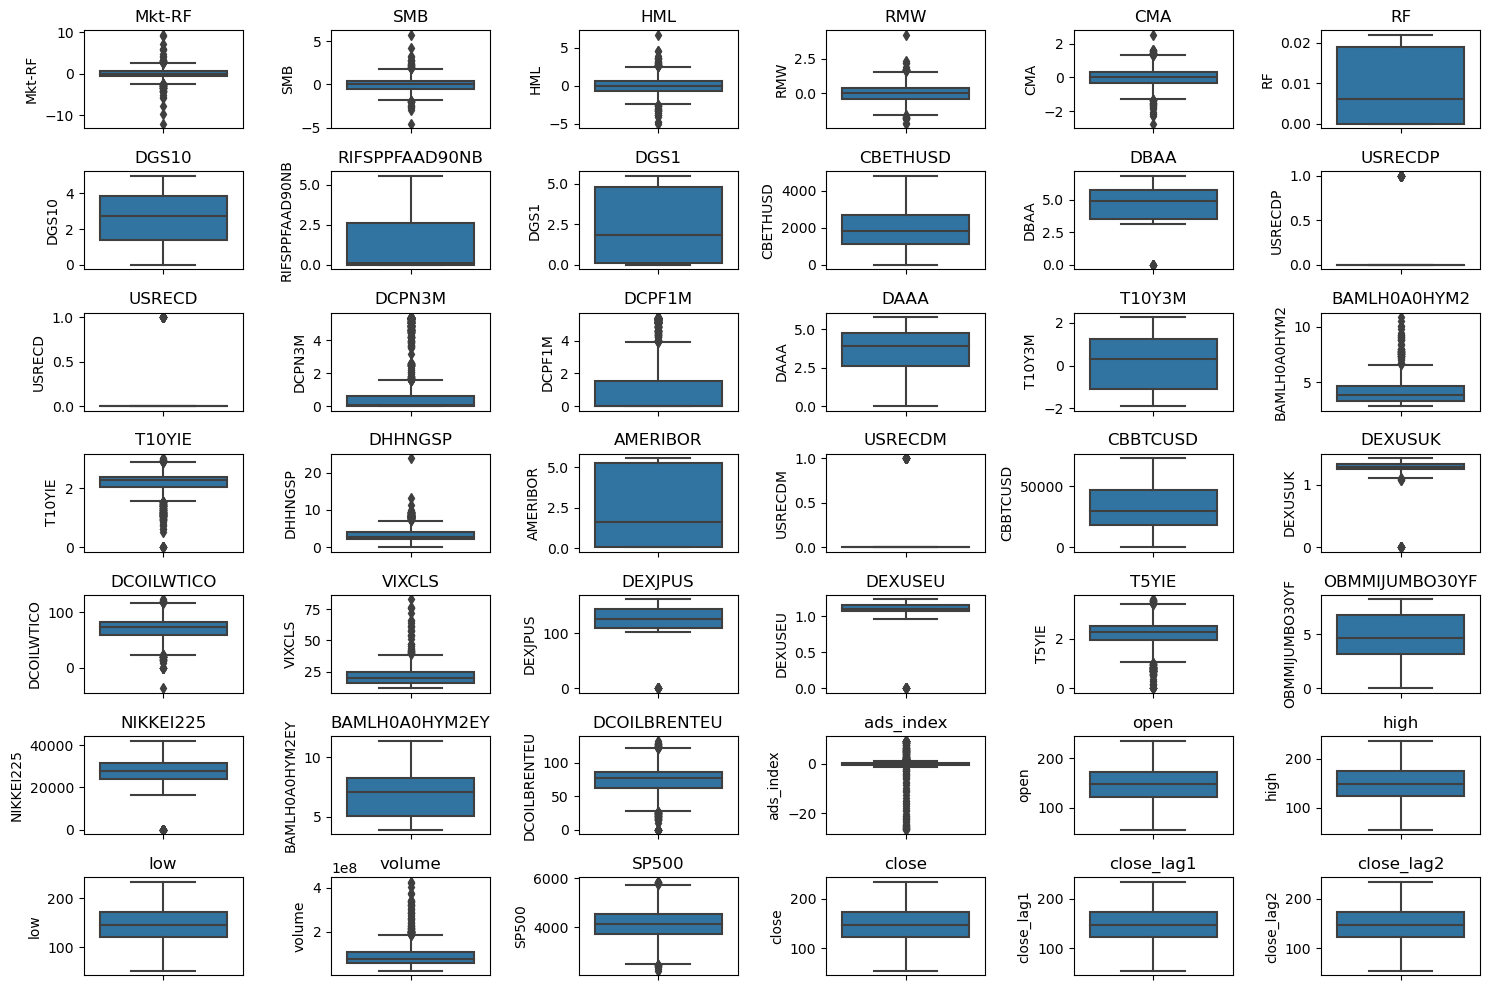

In [77]:
plt.figure(figsize=(15, 10))

# Create a boxplot for each column
for i, column in enumerate(column_list):
    plt.subplot(7, 6, i + 1)  # Adjust the number of rows and columns for your layout
    sns.boxplot(data=df_cleaned, y=column)
    plt.title(column)
    plt.tight_layout()

# Show the plot
plt.show()

# Feature scaling

In [63]:

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [64]:
X_scaled

array([[ 4.13825332e-01,  3.49967405e-01, -2.12624363e-01, ...,
        -2.06582897e+00, -3.50254592e+00, -3.48706887e+00],
       [-1.35558532e-01,  4.97159290e-01,  4.40816232e-01, ...,
        -2.09941186e+00, -2.05496758e+00, -3.48706887e+00],
       [ 1.57446196e-01, -7.78503716e-01, -1.02500997e+00, ...,
        -2.09958654e+00, -2.08844715e+00, -2.04405306e+00],
       ...,
       [-4.03319955e-02,  6.51967249e-03, -6.97683601e-04, ...,
         2.06829346e+00,  2.11617312e+00,  2.05286500e+00],
       [-4.03319955e-02,  6.51967249e-03, -6.97683601e-04, ...,
         2.07721077e+00,  2.06643701e+00,  2.11394086e+00],
       [-4.03319955e-02,  6.51967249e-03, -6.97683601e-04, ...,
         2.14589924e+00,  2.07532689e+00,  2.06436151e+00]])

## A simple feature extraction technique

In [66]:
correlation_matrix = np.abs(np.corrcoef(X_scaled.T, y.T))
correlation_with_target = correlation_matrix[-1][:-1]
selected_features = X.columns[correlation_with_target > 0.1]

In [71]:
selected_features.shape

(33,)

In [73]:
X_scaled.shape

(1253, 42)

## Kendalltau method for correlation 

In [75]:
from scipy.stats import kendalltau

In [76]:
kendall_tau_results = {}

# Calculate Kendall's tau correlation for each feature in X with y
for column in X.columns:
    tau, p_value = kendalltau(X[column], y)  # Calculate Kendall's tau
    kendall_tau_results[column] = {'tau': tau, 'p_value': p_value}

# Convert results to a DataFrame for better readability
kendall_tau_df = pd.DataFrame(kendall_tau_results).T
kendall_tau_df.columns = ['Kendall_tau', 'p_value']

# Display the results
print(kendall_tau_df.sort_values(by='Kendall_tau', ascending=False))

                Kendall_tau        p_value
close              0.599266  1.597106e-213
low                0.596075  2.786123e-211
high               0.595329  9.306312e-211
open               0.590091  4.208520e-207
close_lag1         0.587266  3.854574e-205
close_lag2         0.579048  1.694670e-199
SP500              0.458613  6.691112e-126
DEXJPUS            0.368591   5.653338e-82
NIKKEI225          0.353635   2.208335e-75
DGS10              0.336685   1.657176e-68
CBETHUSD           0.336249   1.452631e-68
CBBTCUSD           0.327120   5.435480e-65
DAAA               0.309481   3.757207e-58
AMERIBOR           0.290467   1.263755e-51
OBMMIJUMBO30YF     0.269836   8.959215e-45
RF                 0.261121   2.693008e-36
DCOILWTICO         0.253127   1.274840e-39
DGS1               0.252341   4.968819e-39
DCOILBRENTEU       0.225134   1.087522e-31
DBAA               0.224668   1.926607e-31
T10YIE             0.177891   3.611741e-20
T5YIE              0.122022   2.478319e-10
BAMLH0A0HYM

# Analysis of Kendall's Tau Correlation with Target Variable

Based on the **Kendall's tau correlation coefficients** and **p-values**, we can derive several insights about the relationships between the features and the target variable (presumably stock price or returns):

## 1. Strong Positive Correlations
- **Top correlated features**: 'close', 'low', 'high', 'open', 'close_lag1', and 'close_lag2' (_tau > 0.57_).
    - _Implication_: Recent price data is highly relevant for predicting future prices.
- **SP500**: Shows a significant positive correlation (_tau ≈ 0.46_), suggesting the overall market index as a predictive factor.

## 2. Moderate Positive Correlations
- **Currency exchange rates**: `DEXJPUS`
- **Stock indices**: `NIKKEI225`
- **Interest rates**: `DGS10`
- **Cryptocurrency prices**: `CBETHUSD`, `CBBTCUSD`
    - _Implication_: These features demonstrate moderate positive correlations, indicating a probable relationship with the target variable.

## 3. Weak to Moderate Negative Correlations
- **Volatility Index (VIXCLS)**: Negative correlation (_tau ≈ -0.21_), indicating higher volatility might predict lower target values.
- **Trading Volume**: Moderate negative correlation (_tau ≈ -0.35_), potentially linking higher trading volume with price decreases.

## 4. Economic Indicators
- **Indicators with weak correlations**: `T10YIE`, `T5YIE`, `BAMLH0A0HYM2EY`
    - _Implication_: Though weak, these statistically significant correlations suggest potential predictive power.

## 5. Recession Indicators
- **Features**: `USRECDP`, `USRECDM`, `USRECD`
    - _Implication_: Weak negative correlations indicate that recessions may relate to lower target values.

## 6. Non-Significant Correlations
- **Non-significant features**: `RMW`, `HML`, `CMA`, `SMB`
    - _Observation_: These show very weak correlations with high p-values, likely not useful as predictors.

## 7. Statistical Significance
- **Low p-values**: Most features have **p-values < 0.05**, denoting statistical significance.
- **High p-values**: For features like `RMW`, `HML`, `CMA`, `SMB`, higher p-values suggest unreliable relationships with the target.

## 8. Potential Multicollinearity
- **Highly correlated price-related features**: `close`, `low`, `high`, `open`
    - _Implication_: Similar correlation coefficients may indicate multicollinearity, which could affect model accuracy.

## 9. Lagged Effects
- **Lagged Close Prices**: `close_lag1`, `close_lag2` have strong correlations, supporting the value of past prices in forecasting future prices, particularly for **time series models**.

## 10. Market Sentiment
- **VIXCLS (Volatility Index)**: Negative correlation suggests **market sentiment impact**, where increased uncertainty is associated with lower target values.

> **Note**: These findings should guide feature selection for predictive modeling, especially considering factors like multicollinearity and statistical significance.


